# Для начала приведём пример работы модели на небольшом Датасете написанном вручную

Импортирование библиотек

In [198]:
import pandas as pd
import numpy as np
import re

Подготовка данных

In [199]:
data = {
    'film_id': [1, 2, 3, 4, 5],
    'title': ['Film A', 'Film B', 'Film C', 'Film D', 'Film E'],
    'genres': [
        ['Action', 'Thriller', 'Drama'],
        ['Romance', 'Comedy'],
        ['Action', 'Adventure', 'Fantasy'],
        ['Drama', 'Romance'],
        ['Comedy', 'Drama', 'Action']
    ]
}

df = pd.DataFrame(data)

In [200]:
# Функция для преобразования жанров в бинарный вектор
def genres_to_vector(all_genress, movie_genres):
    vector = [1 if genre in movie_genres else 0 for genre in all_genress]
    return vector


# Собираем список всех возможных жанров
all_genres = list(set([genre for genres in df['genres'] for genre in genres]))

# Преобразуем жанры каждого фильма в бинарный вектор
df['genre_vector'] = df['genres'].apply(lambda x: genres_to_vector(all_genres, x))

Функция для вычисления коэффициента Жаккара между фильмами

In [201]:
def jaccard_similarity(movie1, movie2):
    intersection = np.sum(np.minimum(movie1, movie2))
    union = np.sum(np.maximum(movie1, movie2))
    return intersection / union if union != 0 else 0

Функция для получения рекомендаций


In [202]:
def recommend_movie(movie_title, d_f=df):
    # Получаем вектор жанров для выбранного фильма
    movie_idx = d_f[d_f['title'] == movie_title].index[0]
    movie_vector = d_f.iloc[movie_idx]['genre_vector']

    # Считаем сходство с другими фильмами
    similarities = []
    for idx, row in d_f.iterrows():
        if row['title'] != movie_title:  # Исключаем сам фильм
            similarity = jaccard_similarity(movie_vector, row['genre_vector'])
            similarities.append((row['title'], similarity))

    # Сортируем фильмы по сходству
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем названия наиболее похожих фильмов
    return [movie for movie, sim in similarities[:3]]  # Рекомендуем 3 фильма

In [203]:
print(recommend_movie('Film A'))

['Film E', 'Film D', 'Film C']


In [204]:
df.iloc[1]

,1
film_id,2
title,Film B
genres,"[Romance, Comedy]"
genre_vector,"[1, 0, 0, 0, 1, 0, 0]"


# Теперь посмотрим на Датасет и получим от него необходимые данные

In [205]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [206]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Изменим формат поля "genres" для понятного отображения списка жанров

In [207]:
def changing_format_1(text):
  return text[1:-1].split('},')

In [208]:
df['genres'] = df['genres'].apply(changing_format_1)

In [209]:
def changing_format_2(text):
  for genre in text:
    if genre != '':
      return [re.findall(r'\w+', genre)[-1] for genre in text]
    else:
      return ['']

In [210]:
df['genres'] = df['genres'].apply(changing_format_2)

In [211]:
df['genres']

,genres
0,"[Action, Adventure, Fantasy, Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Fiction]"
...,...
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, Movie]"
4801,[]


Список уникальных жанров

In [212]:
all_genres = list(set([genre for genres in df['genres'] for genre in genres]))
all_genres.remove('')
all_genres

['Mystery',
 'Fiction',
 'Romance',
 'Drama',
 'Horror',
 'Action',
 'Adventure',
 'Documentary',
 'History',
 'Western',
 'Crime',
 'Family',
 'Animation',
 'Comedy',
 'Fantasy',
 'Music',
 'Thriller',
 'War',
 'Movie',
 'Foreign']

In [213]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [214]:
import matplotlib.pyplot as plt
from collections import Counter

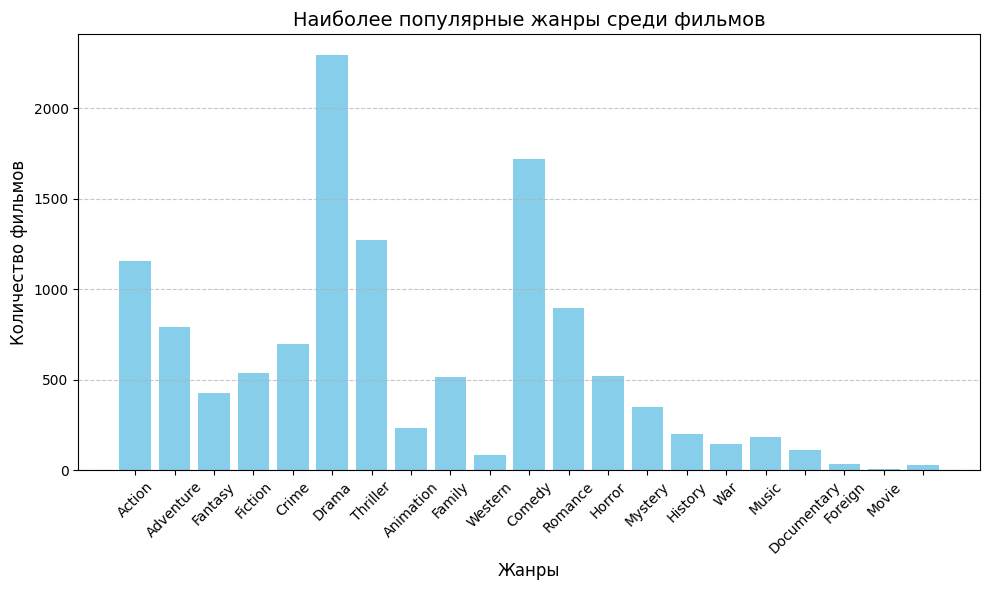

In [215]:
all_genres = [genre for genres in df['genres'] for genre in genres]
genre_counts = Counter(all_genres)

genres = list(genre_counts.keys())
counts = list(genre_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.title('Наиболее популярные жанры среди фильмов', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Построение модели

Подготовка данных

In [216]:
# Преобразуем жанры в бинарный вектор
def genres_to_vector(all_genres, movie_genres):
    return [1 if genre in movie_genres else 0 for genre in all_genres]


# Собираем список всех уникальных жанров
all_genres = list(set(genre for genres in df['genres'] for genre in genres))

# Добавляем вектор жанров для каждого фильма
df['genre_vector'] = df['genres'].apply(lambda x: genres_to_vector(all_genres, x))


In [217]:
df['genre_vector']

,genre_vector
0,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
4798,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4799,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4800,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4801,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Основные функции для работы модели

In [218]:
# Функция для объединения жанров нескольких фильмов
def combine_genre_vectors(selected_movies, df, all_genres):
    combined_vector = [0] * len(all_genres)
    for movie_title in selected_movies:
        movie_vector = df[df['title'] == movie_title]['genre_vector'].iloc[0]
        combined_vector = [max(combined_vector[i], movie_vector[i]) for i in range(len(all_genres))]
    return combined_vector


# Функция для получения рекомендаций
def recommend_movies_based_on_list(selected_movies, df=df):
    # Создаем общий вектор интересов на основе выбранных фильмов
    user_vector = combine_genre_vectors(selected_movies, df, all_genres)

    # Считаем схожесть с каждым фильмом
    similarities = []
    for idx, row in df.iterrows():
        similarity = jaccard_similarity(user_vector, row['genre_vector'])
        similarity *= row['vote_average']
        similarities.append((row['title'], similarity))

    # Исключаем из рекомендаций фильмы, которые уже были просмотрены
    similarities = [sim for sim in similarities if sim[0] not in selected_movies]

    # Сортируем фильмы по схожести
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем топ-3 рекомендации
    return [movie for movie, sim in similarities[:3]]


# Функция для вычисления коэффициента Жаккара
def jaccard_similarity(vector1, vector2):
    intersection = np.sum(np.minimum(vector1, vector2))
    union = np.sum(np.maximum(vector1, vector2))
    return intersection / union if union != 0 else 0

In [219]:
df[df['title'] == 'Avatar']['genres']

,genres
0,"[Action, Adventure, Fantasy, Fiction]"


Пример использования

In [234]:
watched_movies = ['Avatar', 'The Dark Knight Rises']
watched_genres = []
for i in watched_movies:
  watched_genres += [genre for genre in df[df['title'] == i]['genres']]
recommendations = recommend_movies_based_on_list(watched_movies)
recom_genres = []
for i in recommendations:
  recom_genres += [genre for genre in df[df['title'] == i]['genres']]
print(f"Рекомендации на основе фильмов {watched_movies}: {recommendations}", end='\n\n')
print(f"Жанры просмотренных фильмов {watched_genres}")
print(f"Жанры рекоммендованных фильмов {recom_genres}")

Рекомендации на основе фильмов ['Avatar', 'The Dark Knight Rises']: ['The Fifth Element', 'The Dark Knight', 'Scarface']

Жанры просмотренных фильмов [['Action', 'Adventure', 'Fantasy', 'Fiction'], ['Action', 'Crime', 'Drama', 'Thriller']]
Жанры рекоммендованных фильмов [['Adventure', 'Fantasy', 'Action', 'Thriller', 'Fiction'], ['Drama', 'Action', 'Crime', 'Thriller'], ['Action', 'Crime', 'Drama', 'Thriller']]


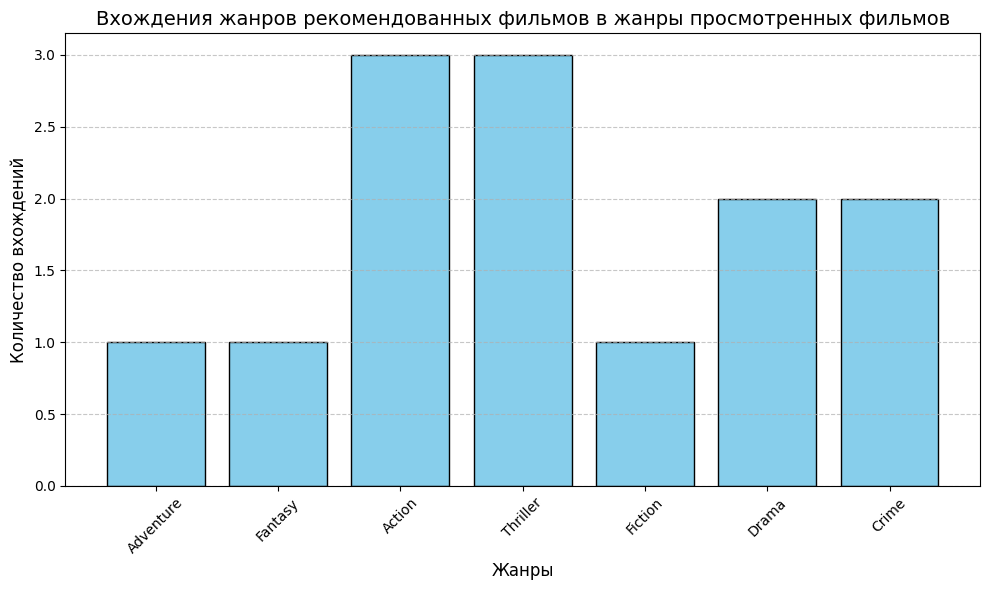

In [235]:
# Объединяем все жанры из просмотренных фильмов
watched_genres_flat = [genre for sublist in watched_genres for genre in sublist]

# Считаем вхождения жанров из рекомендаций в жанры из просмотренных фильмов
matches = Counter()
for rec_genres in recom_genres:
    for genre in rec_genres:
        if genre in watched_genres_flat:
            matches[genre] += 1

# Данные для графика
genres = list(matches.keys())
counts = list(matches.values())

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='skyblue', edgecolor='black')
plt.title('Вхождения жанров рекомендованных фильмов в жанры просмотренных фильмов', fontsize=14)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Количество вхождений', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

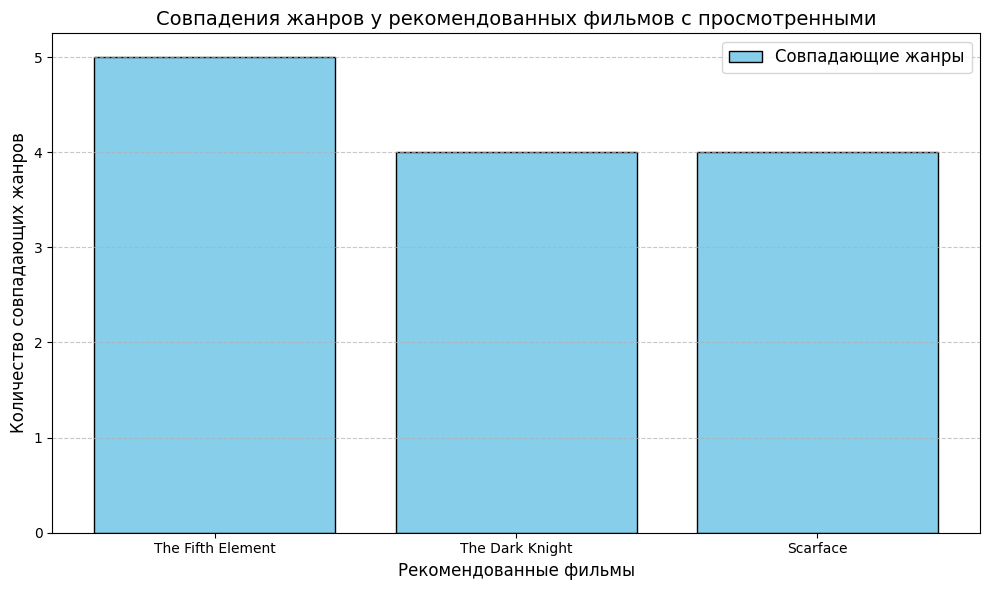

In [238]:
# Подсчитываем количество совпадающих жанров для каждого рекомендованного фильма
matching_counts = [sum(1 for genre in rec_genres if genre in watched_genres_flat) for rec_genres in recom_genres]

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(recommendations, matching_counts, color='skyblue', edgecolor='black', label='Совпадающие жанры')
plt.title('Совпадения жанров у рекомендованных фильмов с просмотренными', fontsize=14)
plt.xlabel('Рекомендованные фильмы', fontsize=12)
plt.ylabel('Количество совпадающих жанров', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Показ графика
plt.show()

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [222]:
# Собираем список всех уникальных жанров
all_genres = list(set(genre for genres in df['genres'] for genre in genres))

# Добавляем вектор жанров для каждого фильма
df['genre_vector'] = df['genres'].apply(lambda x: genres_to_vector(all_genres, x))

In [223]:
# Разделим данные на X (векторы жанров) и y (целевая переменная - жанры)
X = np.array(df['genre_vector'].tolist())
y = df['genres'].apply(lambda x: ', '.join(x)).tolist()

# Разделим данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
clf = RandomForestClassifier(n_estimators=190, random_state=42)
clf.fit(X_train, y_train)

# Оценка точности
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Пример предсказания жанра для нового фильма
new_movie_vector = genres_to_vector(all_genres, ['Adventure', 'Comedy', 'War', 'Horror', 'Drama', 'Western', 'Thriller'])  # Новый фильм с жанрами Action, Comedy
predicted_genres = clf.predict([new_movie_vector])
print(f'Predicted genres for the new movie: {predicted_genres[0]}')


Accuracy: 0.6014568158168574
Predicted genres for the new movie: Comedy, Drama, Thriller


In [224]:
predicted_genres

array(['Comedy, Drama, Thriller'], dtype='<U62')

In [225]:
for id, row in df.iterrows():
  i = row['genres']
  if 'Action' in i and 'Comedy' in i and 'Horror' in i and 'Thriller' in i:
    print(row['title'], row['genres'])


Eight Legged Freaks ['Action', 'Comedy', 'Horror', 'Thriller']
Lake Placid ['Horror', 'Comedy', 'Action', 'Fiction', 'Thriller']
Dylan Dog: Dead of Night ['Action', 'Comedy', 'Horror', 'Mystery', 'Fiction', 'Thriller']


In [226]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_vector
0,237000000,"[Action, Adventure, Fantasy, Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [227]:
new_movie_vector

[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]

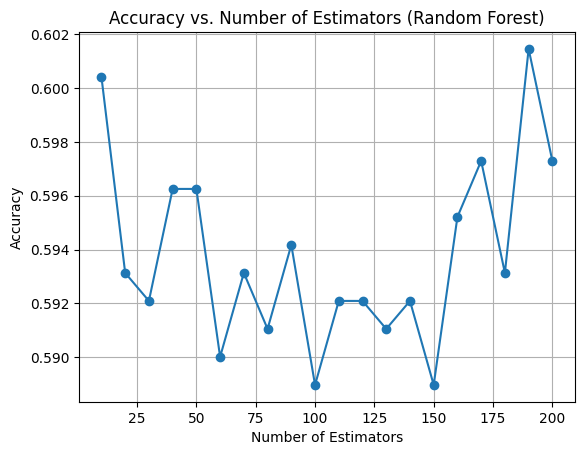

In [228]:
# Сохраняем точность для построения графика
accuracies = []

# Применение кросс-валидации
for n_estimators in range(100, 201, 10):  # Изменение количества деревьев
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Построение графика точности
plt.plot(range(100, 201, 10), accuracies, marker='o')
plt.title('Accuracy vs. Number of Estimators (Random Forest)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()